</h4>Ej.3_ Implementar un sistema de inferencia difusa para controlar un péndulo invertido</h4>

</h4>● Asuma que el carro no tiene espacio restringido para moverse</h4>
    

</h4>● Definir variables lingüísticas de entrada y salida, particiones borrosas, operaciones borrosas para</h4>
</h4>la conjunción, disyunción e implicación, reglas de inferencia (cubrir todas las posibles</h4>
</h4>combinaciones de valores borrosos de entrada en la base de reglas)</h4>
    

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from Difuza import *
from scipy import constants

<h4>Definimos la variable linguistica de entrada angulo de inclinacion</h4>

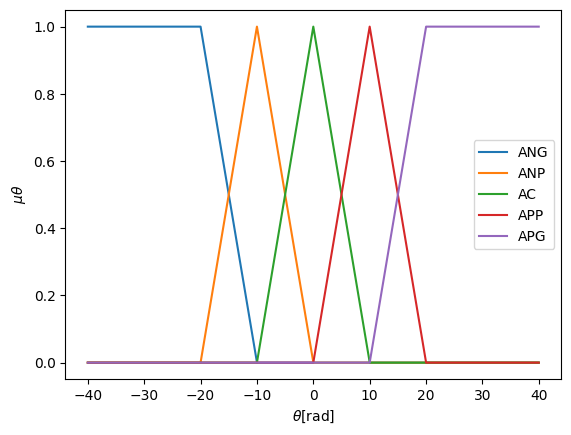

In [3]:
# Universo de discurso para el angulo de inclinacion
thetamax = 40
theta = np.arange(-thetamax, thetamax, 0.01)

# Funciones de pertenencia para el angulo de inclinacion
ANG = trapmf(theta, [-thetamax, -thetamax, -thetamax/2, -thetamax/4])
ANP = trimf(theta, [-thetamax/2, -thetamax/4, 0])
AC = trimf(theta, [-thetamax/4, 0, thetamax/4])
APP = trimf(theta, [0, thetamax/4, thetamax/2])
APG = trapmf(theta, [thetamax/4, thetamax/2, thetamax, thetamax])

#gráficos para el angulo de inclinacion
plt.plot(theta, ANG, label="ANG")
plt.plot(theta, ANP, label="ANP")
plt.plot(theta, AC, label="AC")
plt.plot(theta, APP, label="APP")
plt.plot(theta, APG, label="APG")
plt.legend(loc='best')
plt.xlabel(r'$\theta$[rad]')
plt.ylabel(r'$\mu \theta$')
plt.show()

<h4>Definimos la variable linguistica de entrada velocidad angular</h4>

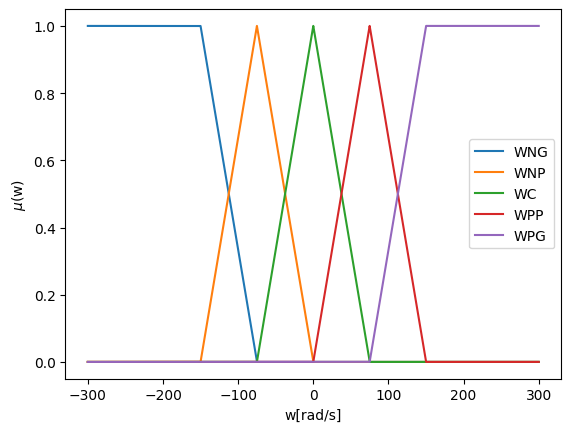

In [4]:
# Universo de discurso para la velocidad angular
wmax = 300
w = np.arange(-wmax, wmax, 0.01)

# Funciones de pertenencia para la velocidad angular
WNG = trapmf(w, [-wmax, -wmax, -wmax/2, -wmax/4])
WNP = trimf(w, [-wmax/2, -wmax/4, 0])
WC = trimf(w, [-wmax/4, 0, wmax/4])
WPP = trimf(w, [0, wmax/4, wmax/2])
WPG = trapmf(w, [wmax/4, wmax/2, wmax, wmax])

#gráficos para la velocidad angular
plt.plot(w, WNG, label="WNG")
plt.plot(w, WNP, label="WNP")
plt.plot(w, WC, label="WC")
plt.plot(w, WPP, label="WPP")
plt.plot(w, WPG, label="WPG")
plt.legend(loc='best')
plt.xlabel('w[rad/s]')
plt.ylabel(r'$\mu$(w)')
plt.show()

<h4>Definimos la variable linguistica de salida Fuerza</h4>

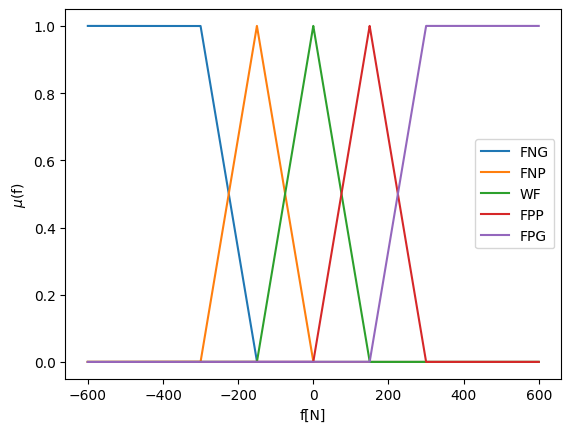

In [5]:
# Universo de discurso para la Fuerza
fmax = 600
f = np.arange(-fmax, fmax, 0.01)

# Funciones de pertenencia para la Fuerza
FNG = trapmf(f, [-fmax, -fmax, -fmax/2, -fmax/4])
FNP = trimf(f, [-fmax/2, -fmax/4, 0])
FC = trimf(f, [-fmax/4, 0, fmax/4])
FPP = trimf(f, [0, fmax/4, fmax/2])
FPG = trapmf(f, [fmax/4, fmax/2, fmax, fmax])

#gráficos para la Fuerza
plt.plot(f, FNG, label="FNG")
plt.plot(f, FNP, label="FNP")
plt.plot(f, FC, label="WF")
plt.plot(f, FPP, label="FPP")
plt.plot(f, FPG, label="FPG")
plt.legend(loc='best')
plt.xlabel('f[N]')
plt.ylabel(r'$\mu$(f)')
plt.show()

<h4>Variables del Sistema</h4>

In [194]:
CONSTANTE_M = 2 # Masa del carro
CONSTANTE_m = 1 # Masa de la pertiga
CONSTANTE_l = 1 # Longitud dela pertiga

In [195]:
#grafica la funcion
def grafica(x,y,delta_t,ordenadas,titulo):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel='time (s)', ylabel=ordenadas, title=titulo+' Delta t = ' + str(delta_t) + " s")
    ax.grid()  
    plt.show()

In [196]:
# Calcula la aceleracion en el siguiente instante de tiempo dado el angulo y la velocidad angular actual, y la fuerza ejercida
def calcula_aceleracion(theta, v, f):
    numerador = constants.g * np.sin(theta) + np.cos(theta) * ((-f - CONSTANTE_m * CONSTANTE_l * np.power(v, 2) * np.sin(theta)) / (CONSTANTE_M + CONSTANTE_m))
    denominador = CONSTANTE_l * (4/3 - (CONSTANTE_m * np.power(np.cos(theta), 2) / (CONSTANTE_M + CONSTANTE_m)))
    return numerador / denominador

In [64]:
# Simula el modelo del carro-pendulo.
# Parametros:
#   t_max: tiempo maximo (inicia en 0)
#   delta_t: incremento de tiempo en cada iteracion
#   theta_0: Angulo inicial (grados)
#   v_0: Velocidad angular inicial (radianes/s)
#   a_0: Aceleracion angular inicial (radianes/s2)
def simular(t_max, delta_t, theta_0, v_0, a_0):
  theta = (theta_0 * np.pi) / 180
  v = v_0
  a = a_0

  # Simular
  y = []
  x = np.arange(0, t_max, delta_t)
  for t in x:
    a = calcula_aceleracion(theta, v, 0)
    v = v + a * delta_t
    theta = theta + v * delta_t + a * np.power(delta_t, 2) / 2
    y.append(theta)
  grafica(x,y,delta_t,r'$\theta$','posicion')

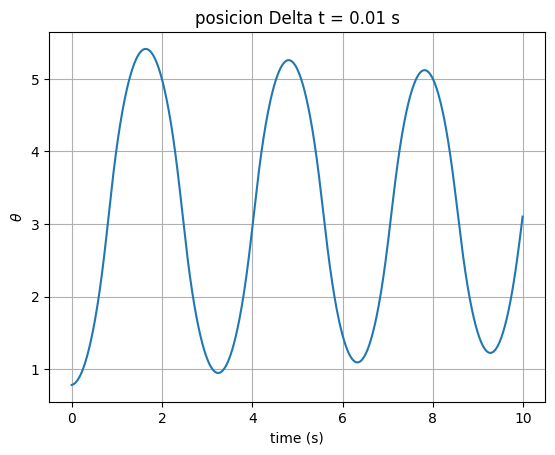

In [65]:
simular(10,0.01,45,0,0)

<h4>Controlador Proporcional</h4>

Fmax=-1156.852
Vmax=-11.046


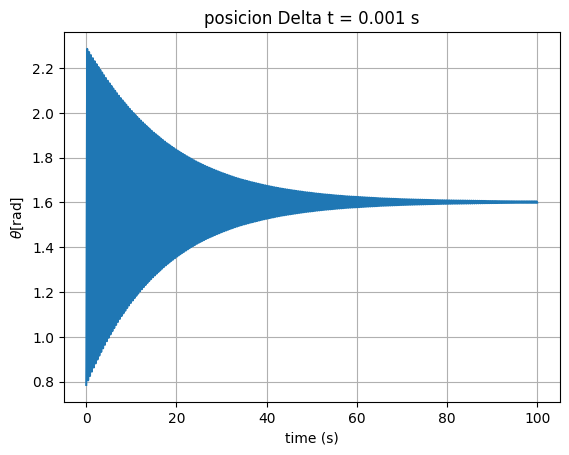

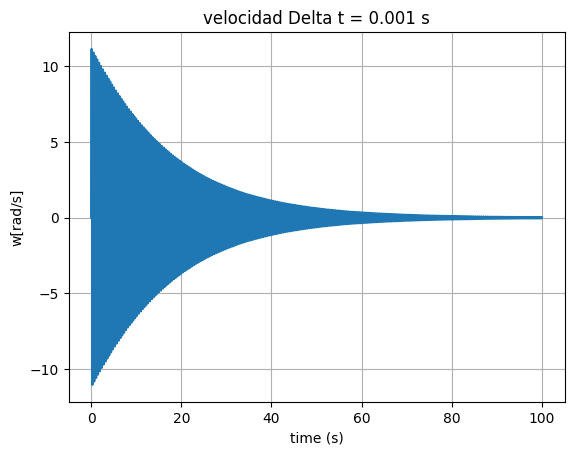

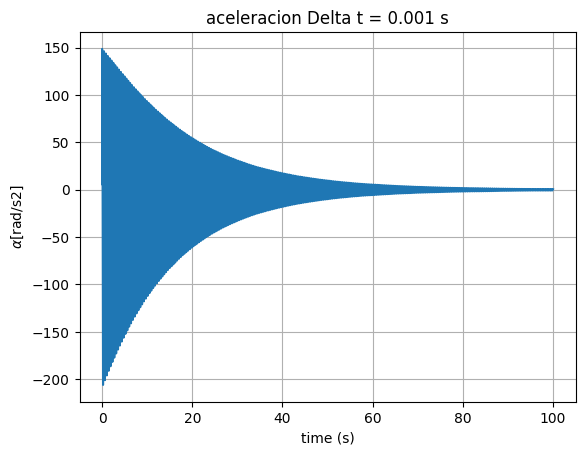

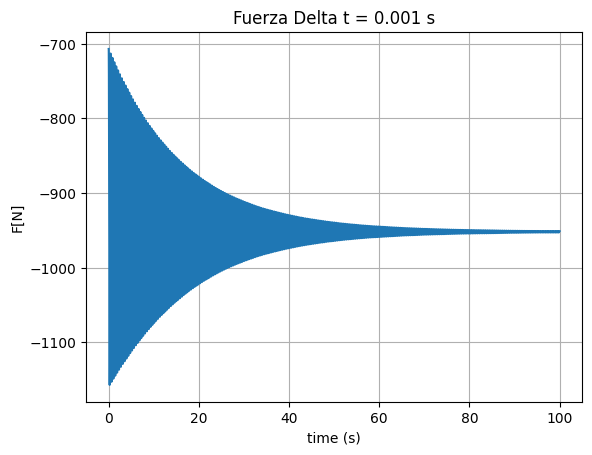

In [53]:
kp = 300    # la constante proporcional

# Definimos los parámetros de la simulación ---------------
t_actual = 0   # tiempo inicial en segundos
t_final = 100    # tiempo final en segundos 
dt = 0.001     # intervalo de tiempo entre muestras, en segundos

# Definimos los valores iniciales -------------------------
pos0=(45*np.pi)/180 
vel0=0
acel0=0
fza = 0        
pos_actual = pos0  # posición inicial en centímetros
pos_deseada = -np.pi/2# posición deseada en centímetros
theta =pos0
v = vel0
a = acel0
# Simular
y = []
yy=[]
yyy=[]
fuerza=[]
fmax=0.0
vmax=0.0
x = np.arange(0, t_final, dt)
for t in x:
  a = calcula_aceleracion(theta, v, fza)
  v = v + a * dt
  theta = theta + v * dt + a * np.power(dt, 2) / 2
  y.append(theta)
  yy.append(v)
  yyy.append(a)
  e=pos_deseada-pos_actual
  fza=kp*e  
  fuerza.append(fza)
  fza=np.round(fza,decimals=3)
  v=np.round(v,decimals=3)
  if v<vmax:
        vmax=v  
  if fza<fmax:
        fmax=fza        
  pos_actual=theta
print('Fmax='+str(fmax))
print('Vmax='+str(vmax))
grafica(x,y,dt,r'$\theta$[rad]','posicion')
grafica(x,yy,dt,'w[rad/s]','velocidad')
grafica(x,yyy,dt,r'$\alpha$[rad/s2]','aceleracion')
grafica(x,fuerza,dt,'F[N]','Fuerza')



<h4>Controlador Difuzo</h4>

<h4>Borrosificacion</h4>

In [197]:
#borrosificacion---------------->pasamos del mundo nitido al mundo borroso
# Universo de discurso para el angulo de inclinacion
thetamax = 90
theta = np.arange(-thetamax, thetamax, dt)
# Funciones de pertenencia para el angulo de inclinacion
ANG = trapmf(theta, [-thetamax, -thetamax, -thetamax/2, -thetamax/4])
ANP = trimf(theta, [-thetamax/2, -thetamax/4, 0])
AC = trimf(theta, [-thetamax/4, 0, thetamax/4])
APP = trimf(theta, [0, thetamax/4, thetamax/2])
APG = trapmf(theta, [thetamax/4, thetamax/2, thetamax, thetamax])
A=[ANG,ANP,AC,APP,APG]
A=np.array(A)
# Universo de discurso para la velocidad angular
wmax = 100
vel = np.arange(-wmax, wmax, dt)
# Funciones de pertenencia para la velocidad angular
WNG = trapmf(vel, [-wmax, -wmax, -wmax/2, -wmax/4])
WNP = trimf(vel, [-wmax/2, -wmax/4, 0])
WC = trimf(vel, [-wmax/4, 0, wmax/4])
WPP = trimf(vel, [0, wmax/4, wmax/2])
WPG = trapmf(vel, [wmax/4, wmax/2, wmax, wmax])
W=[WNG,WNP,WC,WPP,WPG]
W=np.array(W)
# Universo de discurso para la Fuerza
fmax = 300
f = np.arange(-fmax, fmax, dt)
# Funciones de pertenencia para la Fuerza
FNG = trapmf(f, [-fmax, -fmax, -fmax/2, -fmax/4])
FNP = trimf(f, [-fmax/2, -fmax/4, 0])
FC = trimf(f, [-fmax/4, 0, fmax/4])
FPP = trimf(f, [0, fmax/4, fmax/2])
FPG = trapmf(f, [fmax/4, fmax/2, fmax, fmax])
F=[FNG,FNP,FC,FPP,FPG]
F=np.array(F)

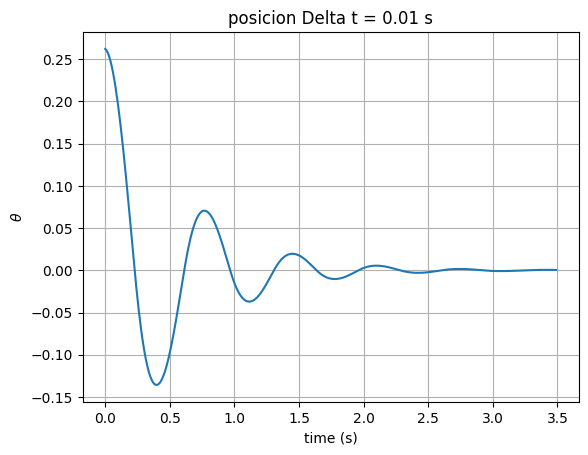

In [200]:
# Definimos los parámetros de la simulación ---------------
t_actual = 0   # tiempo inicial en segundos
t_final = 3.5   # tiempo final en segundos 
dt = 0.01     # intervalo de tiempo entre muestras, en segundos
# Definimos los valores iniciales -------------------------
pos0=(15*np.pi)/180
vel0=0
acel0=0
fza = 0        
thet =pos0
v = vel0
a = acel0
# Simular
y = []
x = np.arange(0, t_final, dt)
for t in x:
  a = calcula_aceleracion(thet, v, fza)
  v = v + a * dt
  
  thet = thet + v * dt + a * np.power(dt, 2) / 2  
  #print(np.round((thet*180)/np.pi,decimals=2))
  y.append(thet)  
  fuzzT=fuzzificar(A,theta,np.round((thet*180)/np.pi,decimals=2))
  fuzzW=fuzzificar(W,vel,np.round(v,decimals=2))
    #Reglas de inferencia
  R1=min(fuzzT[0],fuzzW[0]) #regla 1 theta es NG Y w es NG entonces F es NG
  R2=min(fuzzT[1],fuzzW[0]) #regla 2 theta es NP Y w es NG entonces F es NG
  R3=min(fuzzT[2],fuzzW[0]) #regla 3 theta es Z Y w es NG entonces F es NG
  R4=min(fuzzT[0],fuzzW[1]) #regla 4 theta es NG Y w es NP entonces F es NG
  R5=min(fuzzT[1],fuzzW[1]) #regla 5 theta es NP Y w es NP entonces F es NG
  R6=min(fuzzT[0],fuzzW[2]) #regla 6 theta es NG Y w es Z entonces F es NG

  R7=min(fuzzT[3],fuzzW[0]) #regla 7 theta es PP Y w es NG entonces F es NP
  R8=min(fuzzT[2],fuzzW[1]) #regla 8 theta es Z Y w es NP entonces F es NP
  R9=min(fuzzT[1],fuzzW[2]) #regla 9 theta es NP Y w es Z entonces F es NP
  R10=min(fuzzT[0],fuzzW[3]) #regla 10 theta es NG Y w es PP entonces F es NP

  R11=min(fuzzT[4],fuzzW[0]) #regla 11 theta es PG Y w es NG entonces F es Z
  R12=min(fuzzT[3],fuzzW[1]) #regla 12 theta es PP Y w es NP entonces F es Z
  R13=min(fuzzT[2],fuzzW[2]) #regla 13 theta es Z Y w es Z entonces F es Z
  R14=min(fuzzT[1],fuzzW[3]) #regla 14 theta es NP Y w es PP entonces F es Z
  R15=min(fuzzT[0],fuzzW[4]) #regla 15 theta es NG Y w es PG entonces F es Z

  R16=min(fuzzT[4],fuzzW[1]) #regla 16 theta es PG Y w es NP entonces F es PP
  R17=min(fuzzT[3],fuzzW[2]) #regla 17 theta es PP Y w es Z entonces F es PP
  R18=min(fuzzT[2],fuzzW[3]) #regla 18 theta es Z Y w es PP entonces F es PP
  R19=min(fuzzT[1],fuzzW[4]) #regla 19 theta es NP Y w es PG entonces F es PP

  R20=min(fuzzT[4],fuzzW[2]) #regla 20 theta es PG Y w es Z entonces F es PG
  R21=min(fuzzT[4],fuzzW[3]) #regla 21 theta es PG Y w es PP entonces F es PG
  R22=min(fuzzT[4],fuzzW[4]) #regla 22 theta es PG Y w es PG entonces F es PG
  R23=min(fuzzT[3],fuzzW[3]) #regla 23 theta es PP Y w es PP entonces F es PG
  R24=min(fuzzT[3],fuzzW[4]) #regla 14 theta es PP Y w es PG entonces F es PG
  R25=min(fuzzT[2],fuzzW[4]) #regla 14 theta es Z Y w es PG entonces F es PG

  F1=cortarF(R1,FNG)
  F2=cortarF(R2,FNG)
  F3=cortarF(R3,FNG)
  F4=cortarF(R4,FNG)
  F5=cortarF(R5,FNG)
  F6=cortarF(R6,FNG)
  F7=cortarF(R7,FNP)
  F8=cortarF(R8,FNP)
  F9=cortarF(R9,FNP)
  F10=cortarF(R10,FNP)
  F11=cortarF(R11,FC)
  F12=cortarF(R12,FC)
  F13=cortarF(R13,FC)
  F14=cortarF(R14,FC)
  F15=cortarF(R15,FC)
  F16=cortarF(R16,FPP)
  F17=cortarF(R17,FPP)
  F18=cortarF(R18,FPP)
  F19=cortarF(R19,FPP)

  F20=cortarF(R20,FPG)
  F21=cortarF(R21,FPG)
  F22=cortarF(R22,FPG)
  F23=cortarF(R23,FPG)
  F24=cortarF(R24,FPG)
  F25=cortarF(R25,FPG)
    #Salida Borrosa
  Fr=union([F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25])
    #Desborrosificacion------>pasamos del mundo borroso al mundo nitido
  fza=defuzz(f,Fr,'centroid')
  #print(fza)
grafica(x,y,dt,r'$\theta$','posicion')
